In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

pd.set_option('display.max_columns',None)

In [6]:
old_flight_df = pd.read_feather('data/flights')
flight_df = pd.read_feather('data/v1_clean_flight')
flight_test_df = pd.read_feather('data/v1_clean_flight_test')
fuel_consumption_df = pd.read_feather('data/v1_clean_fuel_consumption')
passenger_df = pd.read_feather('data/v1_clean_passenger')
weather_flight_df = pd.read_feather('data/flight_weather_100')

In [3]:
passenger_df.head()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,air_time,unique_carrier,airline_id,unique_carrier_name,region,carrier_name,origin_airport_id,origin_city_name,origin_country_name,dest_airport_id,dest_city_name,dest_country_name,aircraft_type,year,month,class
0,1.0,1.0,31200.0,156.0,133.0,0.0,0.0,1141.0,150.0,G4,20368,Allegiant Air,D,Allegiant Air,10408,"Appleton, WI",United States,14761,"Sanford, FL",United States,698,2018,11,F
1,16.0,16.0,736000.0,3680.0,2864.0,0.0,0.0,957.0,2111.0,F9,20436,Frontier Airlines Inc.,D,Frontier Airlines Inc.,13204,"Orlando, FL",United States,11433,"Detroit, MI",United States,699,2016,6,F
2,0.0,57.0,76950.0,342.0,157.0,4701.0,7618.0,24.0,717.0,H6,20336,Hageland Aviation Service,D,Hageland Aviation Service,10551,"Bethel, AK",United States,12831,"Kasigluk, AK",United States,35,2017,4,F
3,0.0,1.0,31841.0,58.0,43.0,0.0,0.0,440.0,0.0,AC,19531,Air Canada,I,Air Canada,11433,"Detroit, MI",United States,16149,"Ottawa, Canada",Canada,698,2018,3,L
4,4.0,3.0,57276.0,210.0,197.0,0.0,0.0,284.0,152.0,S5,20448,Shuttle America Corp.,D,Shuttle America Corp.,11618,"Newark, NJ",United States,13931,"Norfolk, VA",United States,677,2016,10,F


In [12]:
busy_airport_df = pd.DataFrame(flight_df[['origin','origin_airport_id']].groupby(['origin','origin_airport_id'],as_index=False).size().sort_values('size',ascending=False))
# busy_airport_df

In [40]:
carrier_df = pd.DataFrame(passenger_df[['unique_carrier_name', 'passengers']].groupby(['unique_carrier_name'], as_index=False).size().sort_values('size',ascending=False))
carrier_df.rename(columns={'unique_carrier_name':'Carrier', 'size':'Total_passengers'},inplace=True)
carrier_df.head(10)
top_carrier_df = carrier_df[:10]
top_carrier_df

,Carrier,Total_passengers
115,Delta Air Lines Inc.,9178
334,United Air Lines Inc.,7859
291,Southwest Airlines Co.,7736
53,American Airlines Inc.,5717
284,SkyWest Airlines Inc.,5444
143,Federal Express Corporation,4219
167,Hageland Aviation Service,2966
139,ExpressJet Airlines LLC,2951
51,Allegiant Air,2466
45,Alaska Airlines Inc.,2412


[Text(0.5, 1.0, 'Top 10 Most Popular Airlines')]

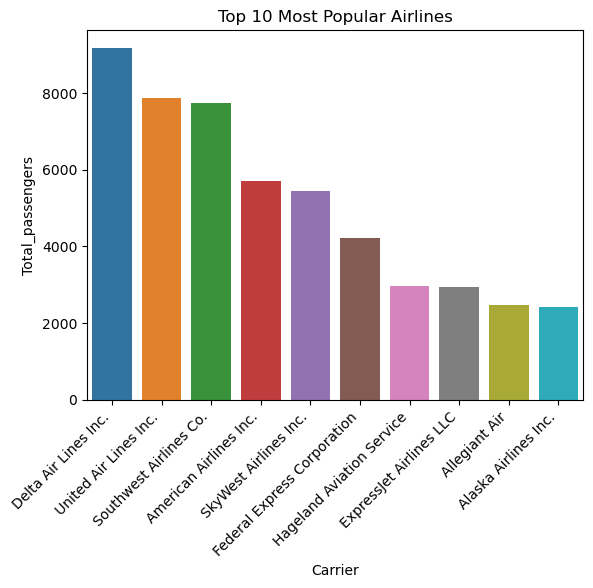

In [62]:
pop_carrier = sns.barplot(data=top_carrier_df, x='Carrier', y='Total_passengers',)
pop_carrier.set_xticklabels(pop_carrier.get_xticklabels(), rotation=45, horizontalalignment='right')
pop_carrier.set(title='Top 10 Most Popular Airlines')

In [64]:
destination_df = pd.DataFrame(passenger_df[['dest_city_name', 'passengers']].groupby(['dest_city_name'], as_index=False).size().sort_values('size',ascending=False))
destination_df.rename(columns={'dest_city_name':'Destination', 'size':'Total_passengers'},inplace=True)
top_dest_df = destination_df[:10]
top_dest_df

,Destination,Total_passengers
233,"Chicago, IL",3885
67,"Atlanta, GA",2776
851,"New York, NY",2590
526,"Houston, TX",2459
317,"Denver, CO",2437
702,"Los Angeles, CA",2148
301,"Dallas/Fort Worth, TX",2047
321,"Detroit, MI",2016
1299,"Washington, DC",1950
775,"Minneapolis, MN",1877


[Text(0.5, 1.0, 'Top 10 Most Popular Destinations')]

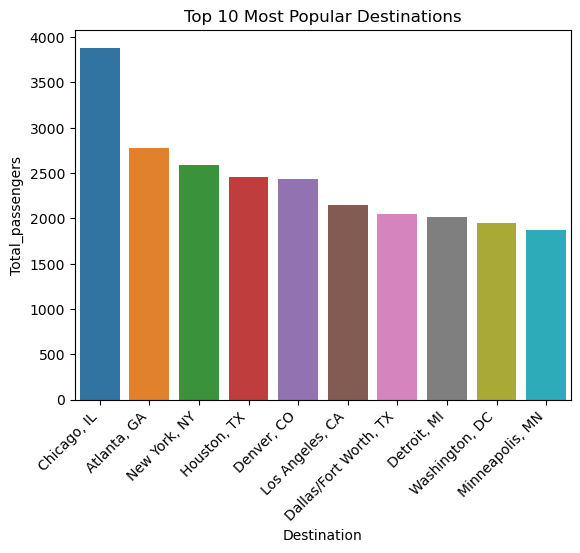

In [65]:
pop_dest = sns.barplot(data=top_dest_df, x='Destination', y='Total_passengers',)
pop_dest.set_xticklabels(pop_dest.get_xticklabels(), rotation=45, horizontalalignment='right')
pop_dest.set(title='Top 10 Most Popular Destinations')

In [72]:
flight_df.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_delay,taxi_out,taxi_in,crs_arr_time,arr_delay,crs_elapsed_time,distance
0,2019-10-28,AA,AA_CODESHARE,AA,4377,YX,N115HQ,4377,10785,BTV,"Burlington, VT",14100,PHL,"Philadelphia, PA",543,-4.0,10.0,8.0,713,-15.0,90.0,335.0
1,2018-06-04,DL,DL_CODESHARE,DL,5491,EV,N741EV,5491,12953,LGA,"New York, NY",11042,CLE,"Cleveland, OH",1415,-5.0,24.0,7.0,1603,-16.0,108.0,419.0
2,2018-07-31,WN,WN,WN,562,WN,N479WN,562,13198,MCI,"Kansas City, MO",13487,MSP,"Minneapolis, MN",940,-4.0,9.0,5.0,1055,-8.0,75.0,393.0
3,2019-10-05,WN,WN,WN,4755,WN,N452WN,4755,14107,PHX,"Phoenix, AZ",14570,RNO,"Reno, NV",1755,21.0,6.0,2.0,1935,13.0,100.0,601.0
4,2018-05-11,WN,WN,WN,1002,WN,N706SW,1002,11884,GEG,"Spokane, WA",13796,OAK,"Oakland, CA",515,1.0,9.0,5.0,720,-14.0,125.0,723.0


In [79]:
busy_time = flight_df[['crs_arr_time', 'dest','dest_city_name']] 
busy_time

,crs_arr_time,dest,dest_city_name
0,713,PHL,"Philadelphia, PA"
1,1603,CLE,"Cleveland, OH"
2,1055,MSP,"Minneapolis, MN"
3,1935,RNO,"Reno, NV"
4,720,OAK,"Oakland, CA"
...,...,...,...
99995,627,PHL,"Philadelphia, PA"
99996,858,MFE,"Mission/McAllen/Edinburg, TX"
99997,626,CLT,"Charlotte, NC"
99998,1022,OGG,"Kahului, HI"


In [80]:
def obtain_hour(df):
    """
    Returns the hour from a string in a dataframe

    Parameters:
        data(pandas dataframe)

    Returns:
        List of the extracted hour from a string (floats)
    """    
    hour_list = []
    for num in df['crs_arr_time'].values:
        if len(str(num)) == 4:
            if str(num)[0:2] == '24':
                hour_list.append('0')
            else:
                hour_list.append(str(num)[0:2])
        elif len(str(num)) == 3:
            hour_list.append(str(num)[0])
        else:
            hour_list.append('0')
    return hour_list    

In [ ]:
# # for hours

# sns.set_theme(style="whitegrid")

# rs = np.random.RandomState(365)
# values = rs.randn(365, 4).cumsum(axis=0)
# dates = pd.date_range("1 1 2016", periods=365, freq="D")
# data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
# data = data.rolling(7).mean()

# sns.lineplot(data=data, palette="tab10", linewidth=2.5)

In [87]:
hour_mark = obtain_hour(flight_df)

In [90]:
busy_time['hour'] = hour_mark
busy_time

/var/folders/_v/3xv7lzg50z70knbq7q2fy3980000gn/T/ipykernel_21998/3712799546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  busy_time['hour'] = hour_mark


,crs_arr_time,dest,dest_city_name,hour
0,713,PHL,"Philadelphia, PA",7
1,1603,CLE,"Cleveland, OH",16
2,1055,MSP,"Minneapolis, MN",10
3,1935,RNO,"Reno, NV",19
4,720,OAK,"Oakland, CA",7
...,...,...,...,...
99995,627,PHL,"Philadelphia, PA",6
99996,858,MFE,"Mission/McAllen/Edinburg, TX",8
99997,626,CLT,"Charlotte, NC",6
99998,1022,OGG,"Kahului, HI",10


In [91]:
# busy_time.groupby(['hour'],as_index=False).mean('hour')
busy_time.drop('crs_arr_time', axis=1)

,dest,dest_city_name,hour
0,PHL,"Philadelphia, PA",7
1,CLE,"Cleveland, OH",16
2,MSP,"Minneapolis, MN",10
3,RNO,"Reno, NV",19
4,OAK,"Oakland, CA",7
...,...,...,...
99995,PHL,"Philadelphia, PA",6
99996,MFE,"Mission/McAllen/Edinburg, TX",8
99997,CLT,"Charlotte, NC",6
99998,OGG,"Kahului, HI",10


In [198]:
busy_hours = pd.DataFrame(busy_time[['hour','dest_city_name','dest']].groupby(['dest','dest_city_name','hour'],as_index=False).size().sort_values('hour',ascending=False).reset_index())
busy_hours.rename(columns={'size':'num_of_flights'}, inplace=True)
busy_hours.drop('index', axis=1, inplace=True)

In [199]:
busy_hours

,dest,dest_city_name,hour,num_of_flights
0,FNT,"Flint, MI",9,3
1,PVD,"Providence, RI",9,16
2,RDU,"Raleigh/Durham, NC",9,56
3,SMF,"Sacramento, CA",9,52
4,BHM,"Birmingham, AL",9,17
...,...,...,...,...
4288,PSE,"Ponce, PR",0,3
4289,IAH,"Houston, TX",0,17
4290,MHT,"Manchester, NH",0,12
4291,DSM,"Des Moines, IA",0,1


In [200]:
ATL = busy_hours[busy_hours['dest'] == 'ATL']
# ATL.sort_values(['hour'], ascending=False)
ATL

,dest,dest_city_name,hour,num_of_flights
53,ATL,"Atlanta, GA",9,347
358,ATL,"Atlanta, GA",8,391
455,ATL,"Atlanta, GA",7,287
559,ATL,"Atlanta, GA",6,68
580,ATL,"Atlanta, GA",5,25
615,ATL,"Atlanta, GA",4,4
827,ATL,"Atlanta, GA",23,61
1083,ATL,"Atlanta, GA",22,92
1176,ATL,"Atlanta, GA",21,289
1505,ATL,"Atlanta, GA",20,373


<AxesSubplot:xlabel='hour', ylabel='num_of_flights'>

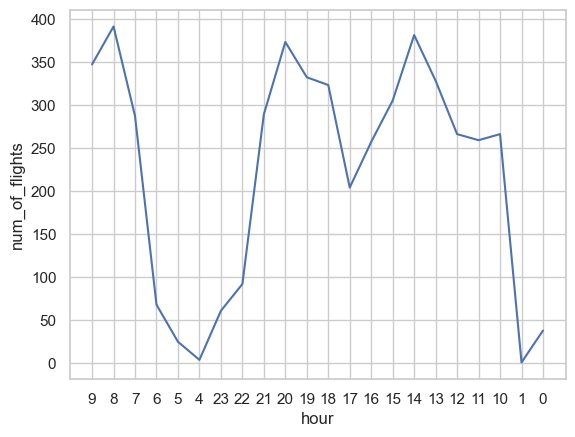

In [201]:
sns.set_theme(style="whitegrid")
sns.lineplot(data=ATL, x='hour', y='num_of_flights')

In [ ]:
sns.set_theme(style="whitegrid")

values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()

sns.lineplot(data=data, palette="tab10", linewidth=2.5)